In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

In [98]:
d = {'names': ['floor_pump', 'floor_nopump', 'stm_pump_stab', 'stm_pump_nostab', 'stm_nopump_stab','stm_nopump_nostab','padding','nopadding'],
     'cols': ['gold', 'm', 'r', 'b', 'k', 'g','navy','darkorange'], 'refs':[2,5,1,6,3,4,1,2]}
leg = pd.DataFrame(data=d)
leg = leg.set_index('names')
print(leg.loc['floor_pump','cols'])
leg

gold


,cols,refs
names,,
floor_pump,gold,2
floor_nopump,m,5
stm_pump_stab,r,1
stm_pump_nostab,b,6
stm_nopump_stab,k,3
stm_nopump_nostab,g,4
padding,navy,1
nopadding,darkorange,2


In [90]:
def noiseplot(path, sheet, curves, plottype, xrange, smooth=False, figsave=False, figtitle='emptyfig'):
    
    dfdat = pd.read_excel(path, sheetname=sheet, delimiter='\t', index_col=0)
    dat = dfdat.reset_index().values
    
    for i in range(len(curves)):
        
        x = dat[:,0]
        y = dat[:,leg.loc[curves[i],'refs']]
        lbl = str(curves[i])
        
        if smooth == True:
            from statsmodels.nonparametric.smoothers_lowess import lowess
            y = lowess(y, x, is_sorted=True, frac=0.001, it=0)[:,1]
            lbl = lbl + ' smthd'
            
        if plottype == 'loglog':
            plt.loglog(x, y, c=leg.loc[curves[i],'cols'], alpha=0.7, lw=2, label=lbl)
        elif plottype == 'semilogy':
            plt.semilogy(x, y, c=leg.loc[curves[i],'cols'], alpha=0.7, lw=2, label=lbl)
            
    plt.xlabel('Frequency / Hz')
    plt.ylabel('Noise / $(V/m/s)_{rms}^{2} Hz^{-1}$')
    plt.ylim(5e-18,1e-9)
    plt.xlim(xrange)
    plt.grid(b=1, which='major', axis='both', lw=1)
    plt.grid(b=1, which='minor', axis='both', lw=0.3)
    plt.title(sheet)
    plt.legend()
    
    if figsave == True:
        plt.savefig(figtitle, dpi=300)
        
    plt.show()
    return

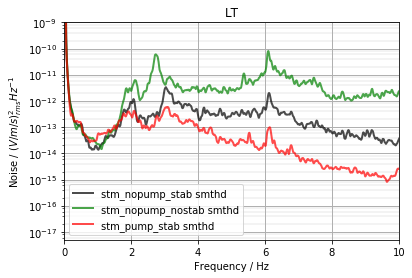

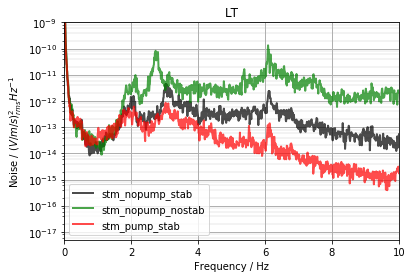

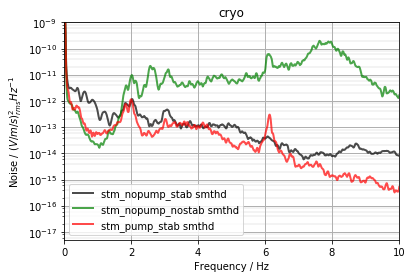

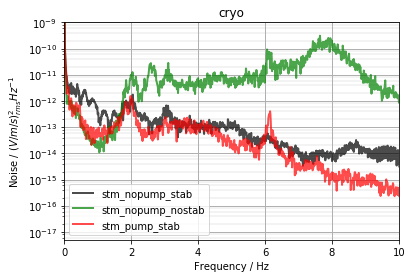

In [91]:
path = r'C:\Users\LT-STM\Desktop\STMmeas\characterisationdata.xlsx'
noiseplot(path, 'LT', ['stm_nopump_stab', 'stm_nopump_nostab', 'stm_pump_stab'], 'semilogy', (0,10), True)
noiseplot(path, 'LT', ['stm_nopump_stab', 'stm_nopump_nostab', 'stm_pump_stab'], 'semilogy', (0,10))
noiseplot(path, 'cryo', ['stm_nopump_stab', 'stm_nopump_nostab', 'stm_pump_stab'], 'semilogy', (0,10), True)
noiseplot(path, 'cryo', ['stm_nopump_stab', 'stm_nopump_nostab', 'stm_pump_stab'], 'semilogy', (0,10))

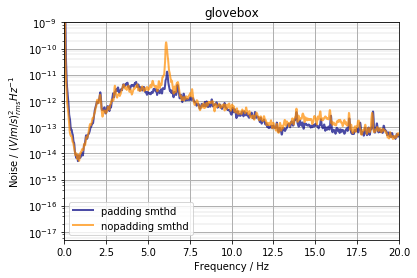

In [99]:
noiseplot(path, 'glovebox', ['padding','nopadding'], 'semilogy', (0,20), True)

In [28]:
x = npdat[:,0]
floor_pump = npdat[:,2]
floor_nopump = npdat[:,5]
stm_pump_stab = npdat[:,1]
stm_pump_nostab = npdat[:,6]
stm_nopump_stab = npdat[:,3]
stm_nopump_nostab = npdat[:,4]

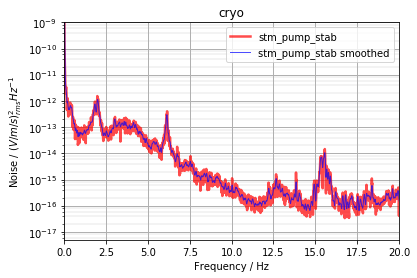

In [47]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.semilogy(x, stm_pump_stab, 'r', alpha=0.7, lw=2.5, label='stm_pump_stab')

yhat = lowess(stm_pump_stab, x, is_sorted=True, frac=0.001, it=0)[:,1]
plt.semilogy(x, yhat, 'b', alpha=0.7, lw=1, label='stm_pump_stab smoothed')

plt.xlabel('Frequency / Hz')
plt.ylabel('Noise / $(V/m/s)_{rms}^{2} Hz^{-1}$')
plt.ylim(5e-18,1e-9)
plt.xlim(0,20)
#plt.xlim(0.5,100)
plt.grid(b=1, which='major', axis='both', lw=1)
plt.grid(b=1, which='minor', axis='both', lw=0.3)
plt.legend()

plt.title(sheet)
#plt.savefig('cryo 4 zoom', dpi=300)
plt.show()

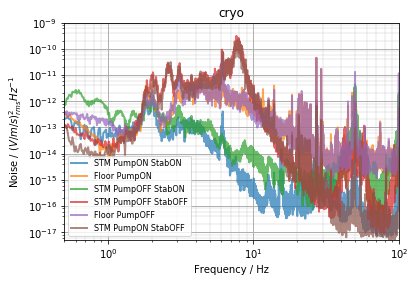

In [223]:
x = npdat[:,0]
for i in range(1,len(npdat[0])):
    y = npdat[:,i]
    plt.loglog(x, y, alpha=0.7, lw=2, label=list(dfdat)[i-1])
plt.xlabel('Frequency / Hz')
plt.ylabel('Noise / $(V/m/s)_{rms}^{2} Hz^{-1}$')
plt.ylim(5e-18,1e-9)
plt.xlim(0.5,100)
plt.grid(b=1, which='major', axis='both', lw=1)
plt.grid(b=1, which='minor', axis='both', lw=0.3)
plt.legend(fontsize=8)
plt.title(sheet)
plt.savefig('cryo all', dpi=300)
plt.show()

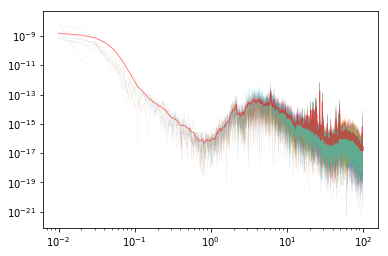

In [89]:
p = r'C:\Users\LT-STM\Desktop\STMmeas\Logs\PUMPglovebox\with pad\20190821_131120-10kHz-100s-10reps.txt'
raw = pd.read_csv(p, sep='\t', header=None, index_col=0)
x = list(raw.index.values)
yavg = raw.mean(axis=1)
yavg = lowess(yavg, x, is_sorted=True, frac=0.001, it=0)[:,1]

plt.loglog(raw,lw=0.1,alpha=0.5)
plt.loglog(x,yavg,'r',lw=1,alpha=0.5)
plt.show()